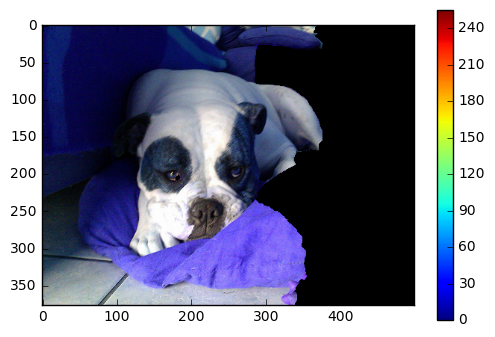

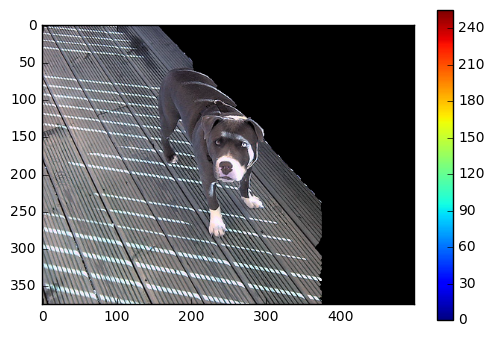

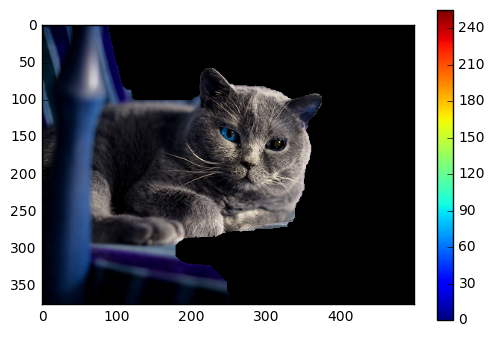

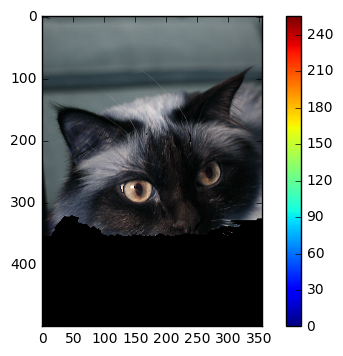

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

def grab(img):
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (0,0,img.shape[0],img.shape[1])
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    return img

def getFeatures(img, catDescriptors, dogDescriptors, dog):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)
    if (dog):
        dogDescriptors.append(des)
    else:
        catDescriptors.append(des)

df = pd.read_csv('C:/Users/Isaac/Downloads/Y_Train.csv')
images = df.Image #you can also use df['column_name']
labels = df.Label
dog = 0

#would be range(image.size) but only doing 10 for this sample
for i in range(10):
    rootdir = ""
    img = cv2.imread('C:/Users/Isaac/Pictures/X_Train/' + images[i])
    if (labels[i] == 1):
        dog = 1
    img = grab(img)
    
    catDescriptors = []
    dogDescriptors = []
    
    getFeatures(img, catDescriptors, dogDescriptors, dog)
    
    plt.imshow(img),plt.colorbar(),plt.show()